<a href="https://colab.research.google.com/github/simongiando/deep-learning/blob/main/Fundamentals/01_neural_network_regression_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01. Neural Network Regression with TensorFlow

There are many definitions for a [regression problem](https://en.wikipedia.org/wiki/Regression_analysis) but in our case, we're going to simplify it to be: predicting a number.

For example, you might want to:
- Predict the selling price of houses given information about them (such as number of rooms, size, number of bathrooms).
- Predict the coordinates of a bounding box of an item in an image.
- Predict the cost of medical insurance for an individual given their demographics (age, sex, gender, race).

In this notebook, we're going to set the foundations for how you can take a sample of inputs (this is your data), build a neural network to discover patterns in those inputs and then make a prediction (in the form of a number) based on those inputs.

## What we're going to cover

Specifically, we're going to go through doing the following with TensorFlow:
- Architecture of a regression model
- Input shapes and output shapes
  - `X`: features/data (inputs)
  - `y`: labels (outputs)
- Creating custom data to view and fit
- Steps in modelling
  - Creating a model
  - Compiling a model
    - Defining a loss function
    - Setting up an optimizer
    - Creating evaluation metrics
  - Fitting a model (getting it to find patterns in our data)
- Evaluating a model
  - Visualizng the model ("visualize, visualize, visualize")
  - Looking at training curves
  - Compare predictions to ground truth (using our evaluation metrics)
- Saving a model (so we can use it later)
- Loading a model



## Typical architecture of a regresison neural network

The word *typical* is on purpose.

Why?

Because there are many different ways (actually, there's almost an infinite number of ways) to write neural networks.

But the following is a generic setup for ingesting a collection of numbers, finding patterns in them and then outputing some kind of target number.

Yes, the previous sentence is vague but we'll see this in action shortly.

| **Hyperparameter** | **Typical value** |
| --- | --- |
| Input layer shape | Same shape as number of features (e.g. 3 for # bedrooms, # bathrooms, # car spaces in housing price prediction) |
| Hidden layer(s) | Problem specific, minimum = 1, maximum = unlimited |
| Neurons per hidden layer | Problem specific, generally 10 to 100 |
| Output layer shape | Same shape as desired prediction shape (e.g. 1 for house price) |
| Hidden activation | Usually [ReLU](https://www.kaggle.com/dansbecker/rectified-linear-units-relu-in-deep-learning) (rectified linear unit) |
| Output activation | None, ReLU, logistic/tanh |
| Loss function | [MSE](https://en.wikipedia.org/wiki/Mean_squared_error) (mean square error) or [MAE](https://en.wikipedia.org/wiki/Mean_absolute_error) (mean absolute error)/Huber (combination of MAE/MSE) if outliers |
| Optimizer | [SGD](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD) (stochastic gradient descent), [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) |

***Table 1:*** *Typical architecture of a regression network.* ***Source:*** *Adapted from page 293 of [Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow Book by Aurélien Géron](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)*

Again, if you're new to neural networks and deep learning in general, much of the above table won't make sense. But don't worry, we'll be getting hands-on with all of it soon.

> 🔑 **Note:** A **hyperparameter** in machine learning is something a data analyst or developer can set themselves, where as a **parameter** usually describes something a model learns on its own (a value not explicitly set by an analyst).

In [1]:
import tensorflow as tf
print(tf.__version__) # check the version (should be 2.x+)

2.12.0


## Creating data to view and fit

Since we're working on a **regression problem** (predicting a number) let's create some linear data (a straight line) to model.

## Creating some data to view and fit

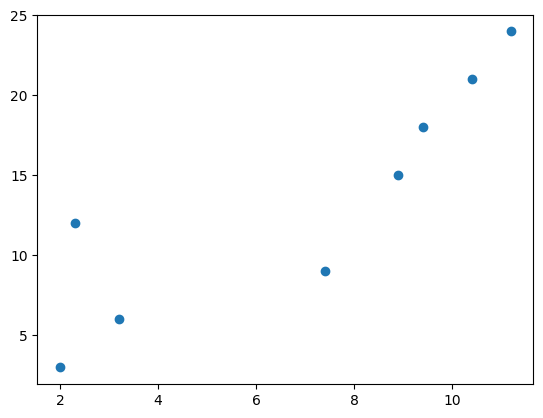

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create Features
X = np.array([2.0,3.2,7.4,2.3,8.9,9.4,10.4,11.2])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X,y)

Before we do any modelling, can you calculate the pattern between `X` and `y`?

For example, say I asked you, based on this data what the `y` value would be if `X` was 17.0?

Or how about if `X` was -10.0?

This kind of pattern discovery is the essence of what we'll be building neural networks to do for us.

## Regression input shapes and output shapes

One of the most important concepts when working with neural networks are the input and output shapes.

The **input shape** is the shape of your data that goes into the model.

The **output shape** is the shape of your data you want to come out of your model.

These will differ depending on the problem you're working on.

Neural networks accept numbers and output numbers. These numbers are typically represented as tensors (or arrays).

Before, we created data using NumPy arrays, but we could do the same with tensors.

## Input and output shapes

In [6]:
y = X+10
y

array([12. , 13.2, 17.4, 12.3, 18.9, 19.4, 20.4, 21.2])

In [7]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom","bathroom","garage"])
house_price = tf.constant([939700])
house_info,house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [9]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [10]:
X[0],y[0]

(2.0, 12.0)

In [11]:
X[1],y[1]

(3.2, 13.2)

In [12]:
# Take a single example of X
input_shape = X[0].shape

# Take a single example of y
output_shape = y[0].shape

# these are both scalars (no shape)
input_shape,output_shape

((), ())

From this it seems our inputs and outputs have no shape?

How could that be?

It's because no matter what kind of data we pass to our model, it's always going to take as input and return as ouput some kind of tensor.

But in our case because of our dataset (only 2 small lists of numbers), we're looking at a special kind of tensor, more specifically a rank 0 tensor or a scalar.

In [13]:
# Let's take a look at the single examples invidually
X[0], y[0]

(2.0, 12.0)

In [25]:
# Turn our Numpy arrays into tensors
X = tf.cast(tf.constant(X),dtype=tf.float32)
y = tf.cast(tf.constant(y),dtype=tf.float32)
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 2. ,  3.2,  7.4,  2.3,  8.9,  9.4, 10.4, 11.2], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([12. , 13.2, 17.4, 12.3, 18.9, 19.4, 20.4, 21.2], dtype=float32)>)

In [15]:
input_shape = X[0].shape
out_shape = y[0].shape
input_shape,out_shape

(TensorShape([]), TensorShape([]))

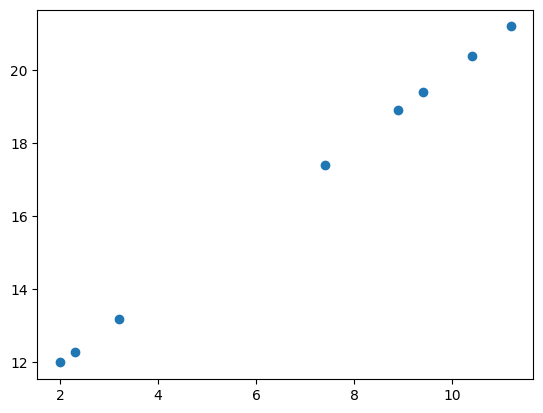

In [16]:
plt.scatter(X,y)

In our case, we're trying to build a model to predict the pattern between `X[0]` equalling `-7.0` and `y[0]` equalling `3.0`.

So now we get our answer, we're trying to use 1 `X` value to predict 1 `y` value.

You might be thinking, "this seems pretty complicated for just predicting a straight line...".

And you'd be right.

But the concepts we're covering here, the concepts of input and output shapes to a model are fundamental.

In fact, they're probably two of the things you'll spend the most time on when you work with neural networks: **making sure your input and outputs are in the correct shape**.

If it doesn't make sense now, we'll see plenty more examples later on (soon you'll notice the input and output shapes can be almost anything you can imagine).

![example of input and output shapes for a housing price prediction problem](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/01-input-and-output-shapes-housing-prices.png)
*If you were working on building a machine learning algorithm for predicting housing prices, your inputs may be number of bedrooms, number of bathrooms and number of garages, giving you an input shape of 3 (3 different features). And since you're trying to predict the price of the house, your output shape would be 1.*

## Steps in modelling with TensorFlow

Now we know what data we have as well as the input and output shapes, let's see how we'd build a neural network to model it.

In TensorFlow, there are typically 3 fundamental steps to creating and training a model.

1. **Creating a model** - piece together the layers of a neural network yourself (using the [Functional](https://www.tensorflow.org/guide/keras/functional) or [Sequential API](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential)) or import a previously built model (known as transfer learning).
2. **Compiling a model** - defining how a models performance should be measured (loss/metrics) as well as defining how it should improve (optimizer).
3. **Fitting a model** - letting the model try to find patterns in the data (how does `X` get to `y`).

Let's see these in action using the [Keras Sequential API](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) to build a model for our regression data. And then we'll step through each.

> **Note:** If you're using [TensorFlow 2.7.0](https://github.com/tensorflow/tensorflow/releases/tag/v2.7.0)+, the `fit()` function no longer upscales input data to go from `(batch_size, )` to `(batch_size, 1)`. To fix this, you'll need to expand the dimension of input data using `tf.expand_dims(input_data, axis=-1)`.
>
> In our case, this means instead of using `model.fit(X, y, epochs=5)`, use `model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)`.

In [ ]:
print(X.shape)

(8,)


In [ ]:
# Expanded dimension
print(tf.expand_dims(X,axis=-1).shape)

(8, 1)


In [27]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1),y,epochs=5) ## the X is expanded

Epoch 1/5
1/1 [==============================] - 1s 833ms/step - loss: 24.8993 - mae: 24.8993
Epoch 2/5
1/1 [==============================] - 0s 39ms/step - loss: 24.4201 - mae: 24.4201
Epoch 3/5
1/1 [==============================] - 0s 25ms/step - loss: 23.9409 - mae: 23.9409
Epoch 4/5
1/1 [==============================] - 0s 28ms/step - loss: 23.4616 - mae: 23.4616
Epoch 5/5
1/1 [==============================] - 0s 27ms/step - loss: 22.9824 - mae: 22.9824


In [28]:
# Check X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 2. ,  3.2,  7.4,  2.3,  8.9,  9.4, 10.4, 11.2], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([12. , 13.2, 17.4, 12.3, 18.9, 19.4, 20.4, 21.2], dtype=float32)>)

In [29]:
# Try and make a prediction using our model
y_pred = model.predict([17.2])
y_pred

1/1 [==============================] - 0s 88ms/step


array([[-14.270424]], dtype=float32)

In [30]:
y_pred +15

array([[0.7295761]], dtype=float32)

## Improving a model

How do you think you'd improve upon our current model?

If you guessed by tweaking some of the things we did above, you'd be correct.

To improve our model, we alter almost every part of the 3 steps we went through before.

1. **Creating a model** - here you might want to add more layers, increase the number of hidden units (also called neurons) within each layer, change the activation functions of each layer.
2. **Compiling a model** - you might want to choose optimization function or perhaps change the **learning rate** of the optimization function.
3. **Fitting a model** - perhaps you could fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

![various options you can use to improve a neural network model](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/02-improving-a-model-from-model-perspective.png)
*There are many different ways to potentially improve a neural network. Some of the most common include: increasing the number of layers (making the network deeper), increasing the number of hidden units (making the network wider) and changing the learning rate. Because these values are all human-changeable, they're referred to as [hyperparameters](https://en.wikipedia.org/wiki/Hyperparameter_(machine_learning)) and the practice of trying to find the best hyperparameters is referred to as [hyperparameter tuning](https://en.wikipedia.org/wiki/Hyperparameter_optimization).*

Woah. We just introduced a bunch of possible steps. The important thing to remember is how you alter each of these will depend on the problem you're working on.

And the good thing is, over the next few problems, we'll get hands-on with all of them.

For now, let's keep it simple, all we'll do is train our model for longer (everything else will stay the same).

In [43]:
# Rebuild the model
# 1. Create the model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 361ms/step - loss: 10.3761 - mae: 10.3761
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 9.8969 - mae: 9.8969
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 9.4176 - mae: 9.4176
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 8.9384 - mae: 8.9384
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 8.4592 - mae: 8.4592
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 7.9800 - mae: 7.9800
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 7.5007 - mae: 7.5007
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 7.0215 - mae: 7.0215
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 6.5423 - mae: 6.5423
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 6.0631 - mae: 6.0631
Epoch 11/100
1/1 [==============================] - 0s 11ms/step - 

You might've noticed the loss value decrease from before (and keep decreasing as the number of epochs gets higher).

What do you think this means for when we make a prediction with our model?

How about we try predict on 17.0 again?

In [44]:
# Remind ourselves of the data
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 2. ,  3.2,  7.4,  2.3,  8.9,  9.4, 10.4, 11.2], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([12. , 13.2, 17.4, 12.3, 18.9, 19.4, 20.4, 21.2], dtype=float32)>)

In [45]:
# Let's see if our model's prediction has imporved
model.predict([15])

1/1 [==============================] - 0s 75ms/step


array([[30.87135]], dtype=float32)

In [46]:
# Test 1
# 1. Build the model
model = tf.keras.Sequential ([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile (loss = tf.keras.losses.mae,
               optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001),
               metrics = ["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 441ms/step - loss: 10.8851 - mae: 10.8851
Epoch 2/100
1/1 [==============================] - 0s 14ms/step - loss: 10.8843 - mae: 10.8843
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 10.8836 - mae: 10.8836
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 10.8828 - mae: 10.8828
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 10.8820 - mae: 10.8820
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 10.8812 - mae: 10.8812
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 10.8804 - mae: 10.8804
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 10.8796 - mae: 10.8796
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 10.8788 - mae: 10.8788
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 10.8781 - mae: 10.8781
Epoch 11/100
1/1 [==============================

In [47]:
# Test 2
# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 855ms/step - loss: 16.9442 - mae: 16.9442
Epoch 2/100
1/1 [==============================] - 0s 16ms/step - loss: 16.9261 - mae: 16.9261
Epoch 3/100
1/1 [==============================] - 0s 17ms/step - loss: 16.9080 - mae: 16.9080
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 16.8899 - mae: 16.8899
Epoch 5/100
1/1 [==============================] - 0s 16ms/step - loss: 16.8718 - mae: 16.8718
Epoch 6/100
1/1 [==============================] - 0s 15ms/step - loss: 16.8537 - mae: 16.8537
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 16.8356 - mae: 16.8356
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 16.8175 - mae: 16.8175
Epoch 9/100
1/1 [==============================] - 0s 13ms/step - loss: 16.7994 - mae: 16.7994
Epoch 10/100
1/1 [==============================] - 0s 13ms/step - loss: 16.7813 - mae: 16.7813
Epoch 11/100
1/1 [==============================

In [48]:
# Test 3
# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50,activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compilse the model
model.compile(loss=tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.Adam(learning_rate= 0.0001),
             metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 591ms/step - loss: 15.5032 - mae: 15.5032
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 15.4969 - mae: 15.4969
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 15.4906 - mae: 15.4906
Epoch 4/100
1/1 [==============================] - 0s 13ms/step - loss: 15.4844 - mae: 15.4844
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 15.4781 - mae: 15.4781
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 15.4718 - mae: 15.4718
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 15.4655 - mae: 15.4655
Epoch 8/100
1/1 [==============================] - 0s 16ms/step - loss: 15.4592 - mae: 15.4592
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 15.4529 - mae: 15.4529
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 15.4466 - mae: 15.4466
Epoch 11/100
1/1 [==============================]

In [49]:
# Test 4
# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50,activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compilse the model
model.compile(loss=tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.Adam(learning_rate= 0.01),
             metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 543ms/step - loss: 18.0480 - mae: 18.0480
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 16.7464 - mae: 16.7464
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 15.4394 - mae: 15.4394
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 14.1212 - mae: 14.1212
Epoch 5/100
1/1 [==============================] - 0s 13ms/step - loss: 12.7883 - mae: 12.7883
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 11.4373 - mae: 11.4373
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 10.0651 - mae: 10.0651
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 8.6689 - mae: 8.6689
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 7.2457 - mae: 7.2457
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 5.7923 - mae: 5.7923
Epoch 11/100
1/1 [==============================] - 0s 9m

In [50]:
# Test 5
# 1. Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile (loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.0001),
              metrics="mae")

# 3. Fit the model
model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 890ms/step - loss: 15.8382 - mae: 15.8382
Epoch 2/100
1/1 [==============================] - 0s 16ms/step - loss: 15.2585 - mae: 15.2585
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 14.7036 - mae: 14.7036
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 14.1535 - mae: 14.1535
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 13.5963 - mae: 13.5963
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 13.0216 - mae: 13.0216
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 12.4346 - mae: 12.4346
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 11.8401 - mae: 11.8401
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 11.2143 - mae: 11.2143
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 10.5618 - mae: 10.5618
Epoch 11/100
1/1 [==============================] -

In [51]:
model.predict([17.0])

1/1 [==============================] - 0s 404ms/step


array([[33.98318]], dtype=float32)

## Evaluating a model

A typical workflow you'll go through when building neural networks is:

```
Build a model -> evaluate it -> build (tweak) a model -> evaulate it -> build (tweak) a model -> evaluate it...
```

The tweaking comes from maybe not building a model from scratch but adjusting an existing one.

### Visualize, visualize, visualize

When it comes to evaluation, you'll want to remember the words: "visualize, visualize, visualize."

This is because you're probably better looking at something (doing) than you are thinking about something.

It's a good idea to visualize:
* **The data** - what data are you working with? What does it look like?
* **The model itself** - what does the architecture look like? What are the different shapes?
* **The training of a model** - how does a model perform while it learns?
* **The predictions of a model** - how do the predictions of a model line up against the ground truth (the original labels)?

Let's start by visualizing the model.

But first, we'll create a little bit of a bigger dataset and a new model we can use (it'll be the same as before, but the more practice the better).


In [56]:
# Make a bigger dataset
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [57]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

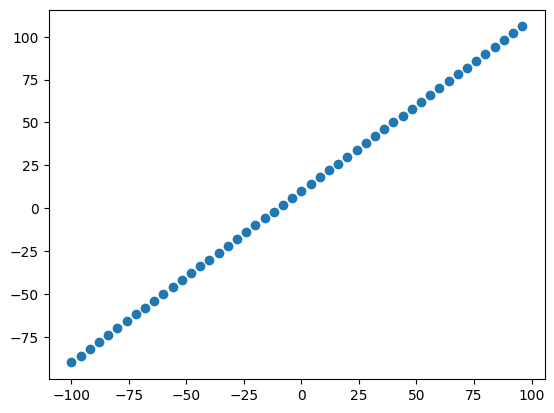

In [58]:
# Visualize the data
import matplotlib.pyplot as plt

plt.scatter(X,y)

## Split data into training/test set

One of the other most common and important steps in a machine learning project is creating a training and test set (and when required, a validation set).

Each set serves a specific purpose:
* **Training set** - the model learns from this data, which is typically 70-80% of the total data available (like the course materials you study during the semester).
* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the total data available (like the practice exam you take before the final exam).
* **Test set** - the model gets evaluated on this data to test what it has learned, it's typically 10-15% of the total data available (like the final exam you take at the end of the semester).

For now, we'll just use a training and test set, this means we'll have a dataset for our model to learn on as well as be evaluated on.

We can create them by splitting our `X` and `y` arrays.

> 🔑 **Note:** When dealing with real-world data, this step is typically done right at the start of a project (the test set should always be kept separate from all other data). We want our model to learn on training data and then evaluate it on test data to get an indication of how well it **generalizes** to unseen examples.

In [59]:
# Split into 3 sets
len(X)

50

In [62]:
# Split the data into train and test sets
X_train = X[:40] # First 40 are training smaples (80% of the data)
y_train = y[:40]

X_test = X[40:] # last 10 are testing samaples (20% of the data)
y_test = y[40:]

len(X_train),len(X_test),len(y_train),len(y_test)

(40, 10, 40, 10)

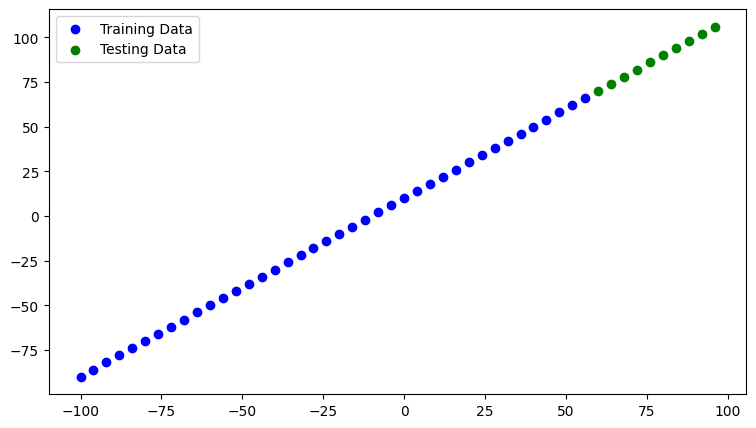

In [66]:
# Visualizing the data
plt.figure(figsize=(9,5))

# plot the training data
plt.scatter(X_train,y_train,c='blue',label='Training Data')

# Plot the testing data
plt.scatter(X_test,y_test,c='green',label='Testing Data')

# Show the legend
plt.legend()

With this graph in mind, what we'll be trying to do is build a model which learns the pattern in the blue dots (`X_train`) to draw the green dots (`X_test`).

Time to build a model. We'll make the exact same one from before (the one we trained for longer).

In [70]:
# Let's have a look at how to build a neural network for our data
# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# # 3. Fit the model
# model.fit(X_train,y_train,epochs=100)

In [71]:
model.summary()

ValueError: ignored

In [130]:
# Let's create amodel which builds automatically by defining the input_shape in the first layer
tf.random.set_seed(42)

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu",input_shape=[1],name="input_layers"),# input shape depending of your data
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1,name="ouput_layer")
],name="Model_1")

# 2. Compile the model
model.compile (loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.0001),
              metrics="mae")

In [131]:
model.summary()

Model: "Model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layers (Dense)        (None, 100)               200       
                                                                 
 dense_60 (Dense)            (None, 100)               10100     
                                                                 
 dense_61 (Dense)            (None, 100)               10100     
                                                                 
 dense_62 (Dense)            (None, 100)               10100     
                                                                 
 ouput_layer (Dense)         (None, 1)                 101       
                                                                 
Total params: 30,601
Trainable params: 30,601
Non-trainable params: 0
_________________________________________________________________


Calling `summary()` on our model shows us the layers it contains, the output shape and the number of parameters.
* **Total params** - total number of parameters in the model.
* **Trainable parameters** - these are the parameters (patterns) the model can update as it trains.
* **Non-trainable parameters** - these parameters aren't updated during training (this is typical when you bring in the already learned patterns from other models during transfer learning).

> 📖 **Resource:** For a more in-depth overview of the trainable parameters within a layer, check out [MIT's introduction to deep learning video](https://youtu.be/njKP3FqW3Sk).

> 🛠 **Exercise:** Try playing around with the number of hidden units in the `Dense` layer (e.g. `Dense(2)`, `Dense(3)`). How does this change the Total/Trainable params? Investigate what's causing the change.

For now, all you need to think about these parameters is that their learnable patterns in the data.

Let's fit our model to the training data.

In [132]:
# Let's fit our model to the training data
model.fit(X_train,y_train,epochs=100,verbose=0)

In [133]:
# Call a summary of the model
model.summary()

Model: "Model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layers (Dense)        (None, 100)               200       
                                                                 
 dense_60 (Dense)            (None, 100)               10100     
                                                                 
 dense_61 (Dense)            (None, 100)               10100     
                                                                 
 dense_62 (Dense)            (None, 100)               10100     
                                                                 
 ouput_layer (Dense)         (None, 1)                 101       
                                                                 
Total params: 30,601
Trainable params: 30,601
Non-trainable params: 0
_________________________________________________________________


Alongside summary, you can also view a 2D plot of the model using [`plot_model()`](https://www.tensorflow.org/api_docs/python/tf/keras/utils/plot_model).

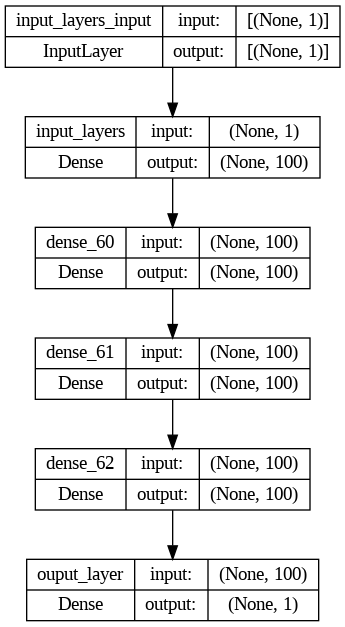

In [134]:
from tensorflow.keras.utils import plot_model

plot_model(model=model,show_shapes=True)

## Visualizing the predictions

Now we've got a trained model, let's visualize some predictions.

To visualize predictions, it's always a good idea to plot them against the ground truth labels.

Often you'll see this in the form of `y_test` vs. `y_pred` (ground truth vs. predictions).

First, we'll make some predictions on the test data (`X_test`), remember the model has never seen the test data.

In [135]:
# Make some predictions
y_preds = model.predict(X_test)
y_preds

1/1 [==============================] - 0s 70ms/step


array([[ 72.921295],
       [ 77.56669 ],
       [ 82.2121  ],
       [ 86.85844 ],
       [ 91.50579 ],
       [ 96.154945],
       [100.805435],
       [105.45592 ],
       [110.1064  ],
       [114.75689 ]], dtype=float32)

In [136]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

Okay, we get a list of numbers but how do these compare to the ground truth labels?

Let's build a plotting function to find out.

> 🔑 **Note:** If you think you're going to be visualizing something a lot, it's a good idea to functionize it so you can use it later.

In [137]:
# Let's plot the data
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")

  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c="r", label="Predictions")

  # Show the legend
  plt.legend();

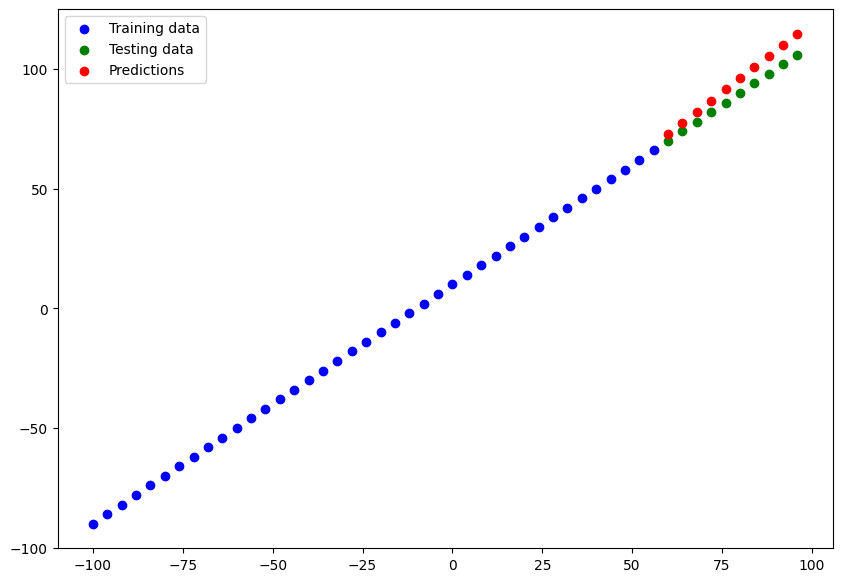

In [138]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_preds)

## Evaluating predictions

Alongisde visualizations, evaulation metrics are your alternative best option for evaluating your model.

Depending on the problem you're working on, different models have different evaluation metrics.

Two of the main metrics used for regression problems are:
* **Mean absolute error (MAE)** - the mean difference between each of the predictions.
* **Mean squared error (MSE)** - the squared mean difference between of the predictions (use if larger errors are more detrimental than smaller errors).

The lower each of these values, the better.

You can also use [`model.evaluate()`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#evaluate) which will return the loss of the model as well as any metrics setup during the compile step.

In [145]:
# Evaluate the model on the test
model.evaluate (X_test,y_test)

1/1 [==============================] - 0s 39ms/step - loss: 5.8344 - mae: 5.8344


[5.8343915939331055, 5.8343915939331055]

In [146]:
# Calculate MAE
mae = tf.metrics.mean_absolute_error(y_true = y_test,
                                     y_pred = y_pred)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([13.645144 , 11.2519045, 10.03686  , 10.152234 , 11.4826565,
       13.991264 , 17.678064 , 22.543037 , 27.48851  , 32.433983 ],
      dtype=float32)>

In [147]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 75.92476],
       [ 80.87024],
       [ 85.8157 ],
       [ 90.76117],
       [ 95.70664],
       [100.65211],
       [105.59758],
       [110.54304],
       [115.48851],
       [120.43398]], dtype=float32)>

In [148]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [149]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 75.92476,  80.87024,  85.8157 ,  90.76117,  95.70664, 100.65211,
       105.59758, 110.54304, 115.48851, 120.43398], dtype=float32)>

In [150]:
# Calculate MAE
mae = tf.metrics.mean_absolute_error(y_true = y_test,
                                     y_pred = tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=10.179373>

In [151]:
# Calculate MSE
mse = tf.metrics.mean_squared_error(y_true= y_test,
                                   y_pred= tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=110.994385>

In [158]:
# Make some functions to reuse MAE and MSE
def mae (y_true,y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true,
                                        y_pred=y_pred)
def mse (y_true,y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true,
                                        y_pred=y_pred)

### Running experiments to improve the model
```
Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it....

1. Get more data - get more examples for your model to train on (more opportunities to learn patterns or relationships between features and labels).
2. Make your model larger (using a more complex model)- this might come in the form of more layers or more hidden units in each layer.
3. Train for longer - give your model more more of a chance to find patterns in the data.

Let's do 3 modelling experiments:
1. `model_1` - same as the original model, 1 layer, trained for 100 epochs
2. `model_2` - 2 layers, trained for 100 epochs
3. `model_3` - 2 layers, trained for 500 epochs

**Build** `model_1`

In [153]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [160]:
# Set random seed
tf.random.set_seed(42)

# Replicate original model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1,input_shape=[1])
],name="Model_1")

# Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
history = model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 10ms/step - loss: 110.6846 - mae: 110.6846
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 75.2292 - mae: 75.2292
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 37.6619 - mae: 37.6619
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 8.1754 - mae: 8.1754
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 10.7192 - mae: 10.7192
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 9.9206 - mae: 9.9206
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 8.9848 - mae: 8.9848
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 9.1109 - mae: 9.1109
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 19.7270 - mae: 19.7270
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 10.6804 - mae: 10.6804
Epoch 11/100
2/2 [==============================] - 0s 6ms/step 

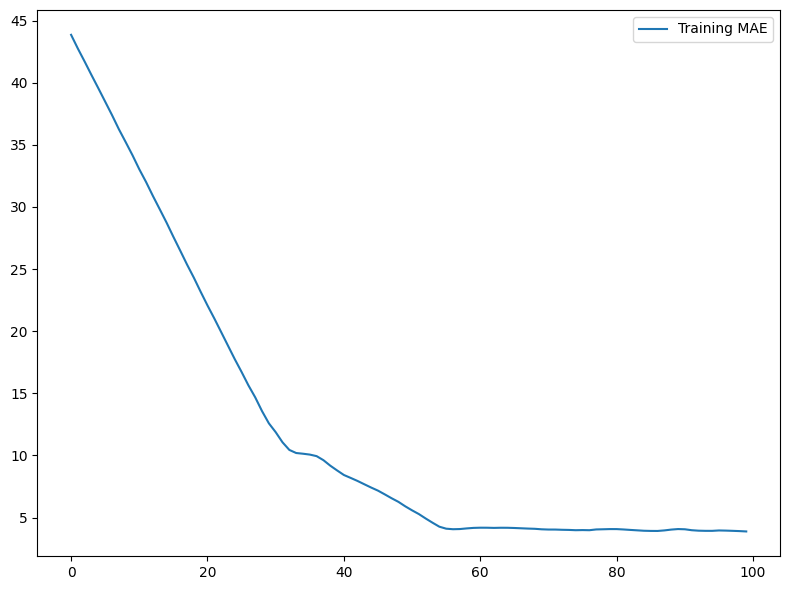

In [205]:
model_history = pd.DataFrame(history.history)
model_history['epoch'] = history.epoch

fig, ax = plt.subplots(1, figsize=(8,6))
num_epochs = model_history.shape[0]

ax.plot(np.arange(0, num_epochs), model_history["mae"],
        label="Training MAE")
ax.legend()

plt.tight_layout()
plt.show()

1/1 [==============================] - 0s 49ms/step


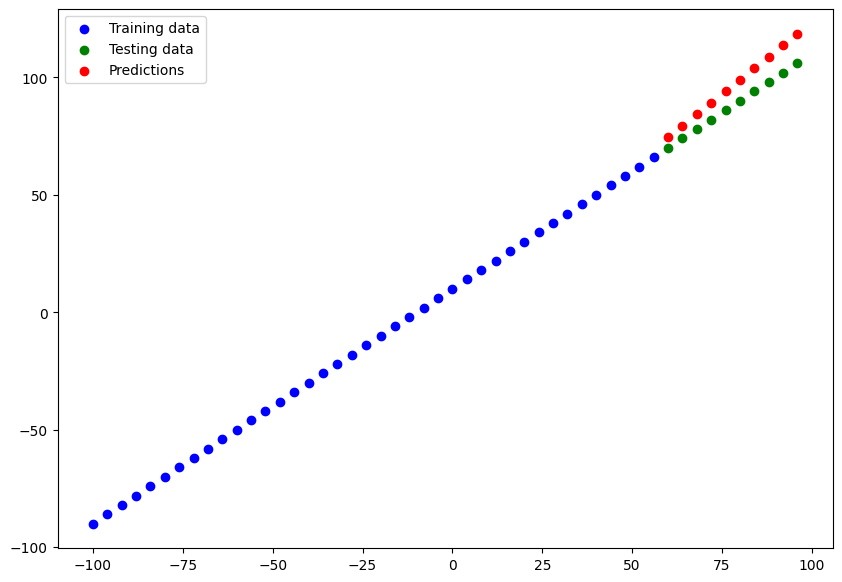

In [156]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [159]:
# Calculate model_1 metrics
mae_1 = mae(y_test, y_preds_1.squeeze()).numpy()
mse_1 = mse(y_test, y_preds_1.squeeze()).numpy()
mae_1, mse_1

(8.549457, 79.575485)

**Build `model_2`**

This time we'll add an extra dense layer (so now our model will have 2 layers) whilst keeping everything else the same.

In [203]:
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu",input_shape=[1],name="input_layers"),# input shape depending of your data
    tf.keras.layers.Dense(1,name="ouput_layer")
],name="Model_2")

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.0001),
              metrics="mae")

# Fit the model
history= model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 15ms/step - loss: 43.8469 - mae: 43.8469
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 42.7319 - mae: 42.7319
Epoch 3/100
2/2 [==============================] - 0s 9ms/step - loss: 41.6805 - mae: 41.6805
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 40.5977 - mae: 40.5977
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 39.5399 - mae: 39.5399
Epoch 6/100
2/2 [==============================] - 0s 10ms/step - loss: 38.4650 - mae: 38.4650
Epoch 7/100
2/2 [==============================] - 0s 9ms/step - loss: 37.3879 - mae: 37.3879
Epoch 8/100
2/2 [==============================] - 0s 10ms/step - loss: 36.2565 - mae: 36.2565
Epoch 9/100
2/2 [==============================] - 0s 10ms/step - loss: 35.2179 - mae: 35.2179
Epoch 10/100
2/2 [==============================] - 0s 9ms/step - loss: 34.1600 - mae: 34.1600
Epoch 11/100
2/2 [==============================] - 0s 

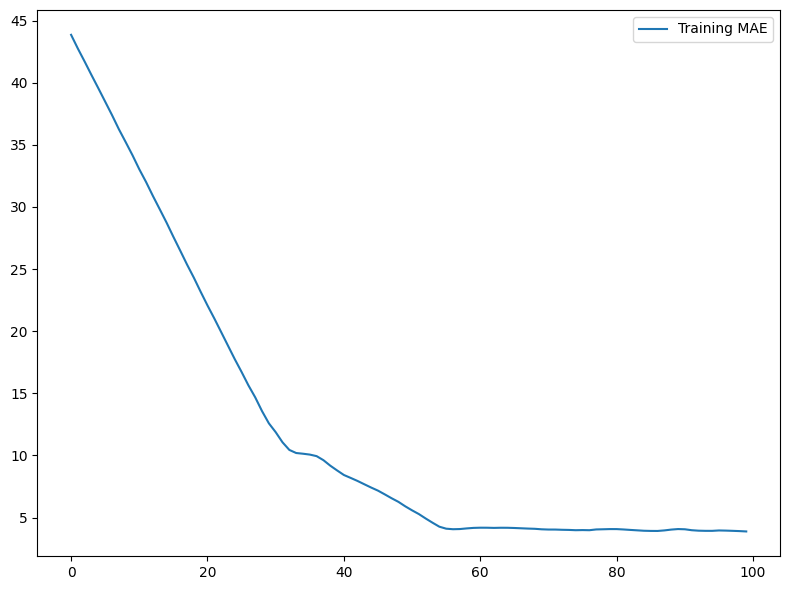

In [204]:
model_history = pd.DataFrame(history.history)
model_history['epoch'] = history.epoch

fig, ax = plt.subplots(1, figsize=(8,6))
num_epochs = model_history.shape[0]

ax.plot(np.arange(0, num_epochs), model_history["mae"],
        label="Training MAE")
ax.legend()

plt.tight_layout()
plt.show()

1/1 [==============================] - 0s 59ms/step


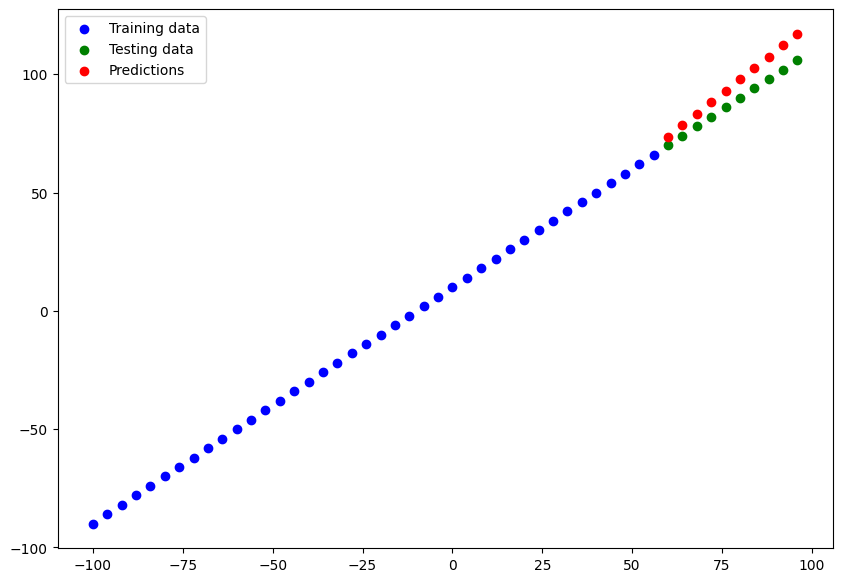

In [178]:
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [175]:
# Calculate model_2 metrics
mae_2 = mae(y_test, y_preds_2.squeeze()).numpy()
mse_2 = mse(y_test, y_preds_2.squeeze()).numpy()
mae_2, mse_2

(7.4652123, 61.44002)

**Build `model_3`**

This time we'll add an extra dense layer (so now our model will have 2 layers) whilst keeping everything else the same.

In [199]:
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu",input_shape=[1],name="input_layers"),# input shape depending of your data
    tf.keras.layers.Dense(1,name="ouput_layer")
],name="Model_3")

# Compile the model
model_3.compile(loss= tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(lr=0.0001),
                metrics=["mae"])
# Fit the model
history = model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 1s 19ms/step - loss: 44.8874 - mae: 44.8874
Epoch 2/500
2/2 [==============================] - 0s 9ms/step - loss: 43.7758 - mae: 43.7758
Epoch 3/500
2/2 [==============================] - 0s 8ms/step - loss: 42.7282 - mae: 42.7282
Epoch 4/500
2/2 [==============================] - 0s 9ms/step - loss: 41.6560 - mae: 41.6560
Epoch 5/500
2/2 [==============================] - 0s 8ms/step - loss: 40.6148 - mae: 40.6148
Epoch 6/500
2/2 [==============================] - 0s 10ms/step - loss: 39.5661 - mae: 39.5661
Epoch 7/500
2/2 [==============================] - 0s 9ms/step - loss: 38.5181 - mae: 38.5181
Epoch 8/500
2/2 [==============================] - 0s 7ms/step - loss: 37.4247 - mae: 37.4247
Epoch 9/500
2/2 [==============================] - 0s 8ms/step - loss: 36.4207 - mae: 36.4207
Epoch 10/500
2/2 [==============================] - 0s 8ms/step - loss: 35.4070 - mae: 35.4070
Epoch 11/500
2/2 [==============================] - 0s 9m

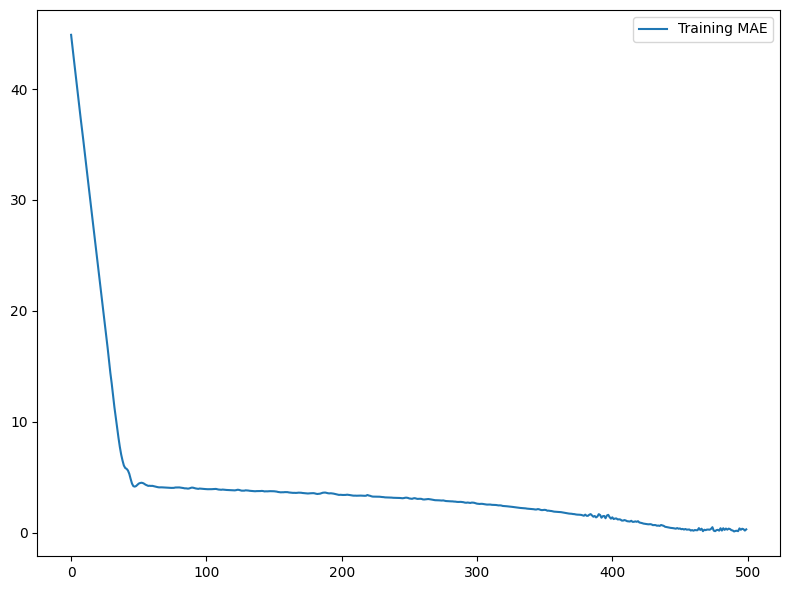

In [202]:
model_history = pd.DataFrame(history.history)
model_history['epoch'] = history.epoch

fig, ax = plt.subplots(1, figsize=(8,6))
num_epochs = model_history.shape[0]

ax.plot(np.arange(0, num_epochs), model_history["mae"],
        label="Training MAE")
ax.legend()

plt.tight_layout()
plt.show()

1/1 [==============================] - 0s 61ms/step


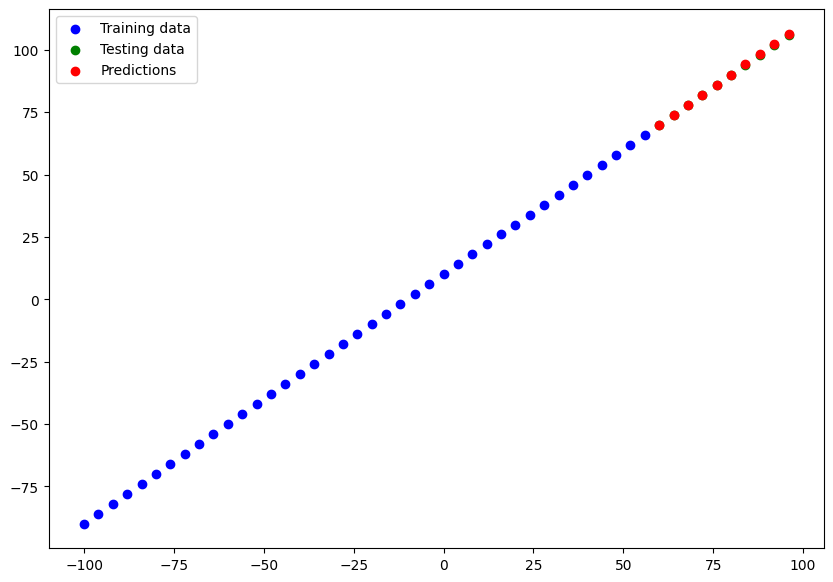

In [180]:
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [181]:
# Calculate model_1 metrics
mae_3 = mae(y_test, y_preds_3.squeeze()).numpy()
mse_3 = mse(y_test, y_preds_3.squeeze()).numpy()
mae_3, mse_3

(0.17697906, 0.05297954)

In [183]:
print("Model 1 Summary:",mae_1, mse_1)
print("Model 2 Summary:",mae_2, mse_2)
print("Model 3 Summary:",mae_3, mse_3)

Model 1 Summary: 8.549457 79.575485
Model 2 Summary: 7.4652123 61.44002
Model 3 Summary: 0.17697906 0.05297954


In [196]:
# Compare all the models
import pandas as pd

model_results = [["model_1",mae_1,mse_1],
                 ["model_2",mae_2,mse_2],
                 ["model_3",mae_3,mse_3]]

all_results = pd.DataFrame(model_results,columns=["model","MAE","MSE"])
all_results

,model,MAE,MSE
0,model_1,8.549457,79.575485
1,model_2,7.465212,61.440022
2,model_3,0.176979,0.052980


In [198]:
model_2.summary()

Model: "Model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layers (Dense)        (None, 100)               200       
                                                                 
 ouput_layer (Dense)         (None, 1)                 101       
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


## Tracking your experiments

One really good habbit in machine learning modelling is to track the results of your experiments.

And when doing so, it can be tedious if you're running lots of experiments

📖 ** Resource:** As you build more models, you'll want to look into using:

* TensorBoard a component of the TensorFlow library to help track modelling experiments (we'll see this one later).
* Weights  Biases - a tool for tracking all of kinds of machine learning experiments (plugs straight into TensorBoard)

## Saving our model

Saving our models allow allow us to use them outside of Google Colaab (or wherever they were trained) such as in a web application or mobile app

There are two main formats we can save our model
1. The SavedModel format
2. The HDF5 format

In [206]:
# Saving our model as saved model
model_3.save("Best_model_SavedModel_format")

In [208]:
# Saving our model as HDF model
model_3.save("Best_model_HDF_format.h5")

## Loading with a saved model

In [210]:
## Load in the SavedModel format model
loaded_savedModel_format = tf.keras.models.load_model("/content/Best_model_SavedModel_format")
loaded_savedModel_format.summary()

Model: "Model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layers (Dense)        (None, 100)               200       
                                                                 
 ouput_layer (Dense)         (None, 1)                 101       
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [211]:
# Compare two models whether they will have the same predictions
model_3_preds = model_3.predict(X_test)
loaded_savedModel_format_preds = loaded_savedModel_format.predict(X_test)
model_3_preds == loaded_savedModel_format_preds

1/1 [==============================] - 0s 63ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [212]:
# Load in the model using the H5 format
loaded_h5_model = tf.keras.models.load_model("/content/Best_model_SavedModel_format.h5")
loaded_h5_model.summary()

Model: "Model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layers (Dense)        (None, 100)               200       
                                                                 
 ouput_layer (Dense)         (None, 1)                 101       
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [214]:
# Compare two models whether they will have the same predictions
model_3_preds = model_3.predict(X_test)
loaded_h5_model_preds = loaded_h5_model.predict(X_test)
model_3_preds == loaded_h5_model_preds

1/1 [==============================] - 0s 102ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Download a model (or any other file) from Google Colab

1. You can go to the "files" tab and right clik and click download
2. You can save it to Google Drive by connecting Google Drive and copying it

In [216]:
# Download a file from Google Colab
from google.colab import files
files.download ("/content/Best_model_SavedModel_format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [217]:
# Save file to Gdrive
!cp /content/Best_model_SavedModel_format.h5 /content/drive/MyDrive/Others

In [218]:
!ls /content/drive/MyDrive/Others

 4.mp4				   KTP.pdf
 5.mp4				   NPWP.pdf
 Best_model_SavedModel_format.h5   Pencapaian.JPG
 CIMG1975.JPG			  'RK Mentee 2021_mixdown.wav'
 Final.m4a			  'RK Mentee.mp4'
 Gaji.pdf			  'SK GIS.pdf'
'Getting started.pdf'		  'SURAT PERJANJIAN PINJAMAN UANG.doc'
 Ijazah.pdf			  'SURAT PERJANJIAN PINJAMAN UANG.docx'
 IMG_5018.JPG			  'SURAT PERJANJIAN PINJAMAN UANG.gdoc'
 IMG_5019.JPG			  'Surat Referensi Kerja.pdf'
 IMG_5020.JPG			   Transkrip.pdf
 IMG_5021.JPG			   warrior_samurai_hd_samurai.jpg
 IMG_5023.JPG
